# 1. Generate 20 real number for the variable X from the uniform distribution U [0,1]

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


# 2. Construct the training set T = { (x 1 ,y 1 ),(x 2 ,y 2 ),……,(x 20 ,y 20 )} using the relation Yi = sin(2 π x i ) + ϵ i where ϵ i ~ N(0,0.25)

In [ ]:
def normal_distribution(std,mean,x):
  return (np.pi*std) * np.exp(-0.5*((x-mean)/std)**2)

In [ ]:
x=np.random.uniform(0,1,20) #20 real numbers for variable X
x=np.sort(x)
y=np.zeros(20)
train=[]
for i in range(20):
  y[i]=math.sin(2*math.pi*x[i])+ normal_distribution(.25,0,x[i])
  train.append((x[i],y[i]))
train

[(0.039215995774749324, 1.0197100932902659),
 (0.04677923508442239, 1.0614771667618337),
 (0.04871693295038504, 1.0719665633568067),
 (0.1567079903838121, 1.478375432204128),
 (0.17416194115009453, 1.5047790676551296),
 (0.17571275679876153, 1.5065373248425078),
 (0.20594749965966797, 1.5213437577020126),
 (0.32222591492688335, 1.2410383302746775),
 (0.34279988833700026, 1.1415408935896059),
 (0.34957884933368133, 1.106033782644419),
 (0.36291336109575845, 1.0325560786507628),
 (0.36650303379889504, 1.0119953919744573),
 (0.48001564418857656, 0.2495571756885449),
 (0.49421617165726894, 0.14762892138682204),
 (0.5354492041802155, -0.14165185380879797),
 (0.7900021493100973, -0.9632497365214329),
 (0.8328020156942012, -0.8646318926755218),
 (0.8575802588896537, -0.7779277717437573),
 (0.8642731983697768, -0.7511285999013596),
 (0.9207139363607394, -0.4769270080404281)]

# 3. In the similar way construct a testing set of size 50 i,e. Test = { (x’ 1 ,y’ 1 ),(x’ 2 ,y’ 2 ),……,(x’ 50 ,y’ 50 )}

In [ ]:
X=np.random.uniform(0,1,50) 
X=np.sort(X)
Y=np.zeros(50)
Test=[]
for i in range(50):
  Y[i]=math.sin(2*math.pi*X[i])+ normal_distribution(.25,0,X[i])
  Test.append((X[i],Y[i]))

# 4. Estimate the Least Square polynomial regression model of order M= 1,2, 3, 9, using the training set T. For example for M=1 , we need to estimate F(x) = β 1 x + β 0 For M = 2 F(x) = β 2 x 2 + β 1 x + β 0 .

In [ ]:
def get_coef(x,y,m):
  matx=np.zeros((m+1,m+1))
  maty=np.zeros(m+1)
  for i in range(m+1):
    for j in range(m+1):
      if(i==0 and j==0):
        matx[i][j]=len(x)
      else:
        matx[i][j]=np.sum(x**(i+j))
  for i in range(m+1):
    maty[i]=np.sum(y*(x**i))
  maty=np.matrix.transpose(maty)
  X = np.linalg.inv(matx).dot(maty)
  return X


# 5. List the value of coefficients of estimated polynomial regression models for each case.

In [ ]:
m=[1,2,3,9]
coef=[]
for i in range(len(m)):
  coef.append(get_coef(x,y,m[i]))
  print(coef[i])


[ 1.72839344 -2.80276835]
[ 1.41104482 -0.70171189 -2.17952586]
[  0.63004559  10.6716405  -35.62172473  24.74985228]
[  0.78587477   6.26387584  -5.92537308 -44.64576721  41.07147217
  42.79663086 -37.69702148 -12.89160156   8.0859375    2.16339111]


# 6. Obtain the prediction on testing set and compute the RMSE for polynomial regression models for order M =1,2,3 and 9 .

In [ ]:
def rms(x,y,m):
  y_predicted=np.zeros(len(x))
  c=0
  for i in range(len(x)):
    y_predicted[i]+=m[0]
    for j in range(len(m)-1):
      y_predicted[i]+=m[j+1]*x[i]**j
    c+=(y_predicted[i]-y[i])**2
    c=c**0.5/len(x)
  return [c,y_predicted]



In [ ]:
#rms for train set
train=[]
for ind in range(len(m)):
  train.append(rms(x,y,coef[ind]))
  print(train[ind][0])

0.030589404326980003
0.041697176262138355
0.006167177503623981
0.007917324606996377


In [ ]:
#rms for test set
test=[]
for ind in range(len(m)):
  test.append(rms(X,Y,coef[ind]))
  print(test[ind][0])

0.020320509262751404
0.027765935662665636
0.007153772216153906
0.000549390941721365


# 7. Plot the estimate obtained by polynomial regression models for order M =1,2,3 and 9 for training set along with y 1, y 2, , y 50. . Also plot our actual mean estimate E(Y/X) = sin(2 π x i ) .

In [ ]:
y_n1=np.zeros(20)
t_n=[]
for i in range(20):
  y_n1[i]=math.sin(2*math.pi*x[i])

In [ ]:
def plot_(x,y1,y2,y3):
  plt.plot(x,y1,label="Noise")
  plt.plot(x,y2,label="Predicted")
  plt.plot(x,y3,label="Actual")
  plt.legend()
  plt.show()


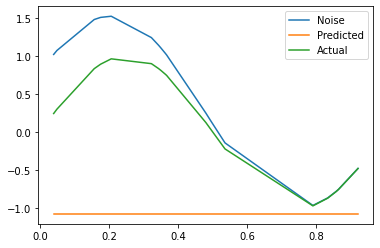

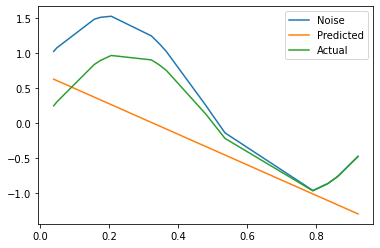

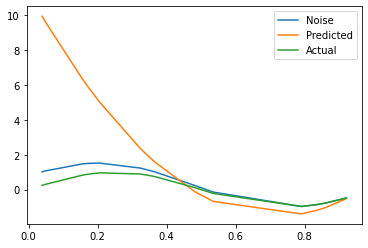

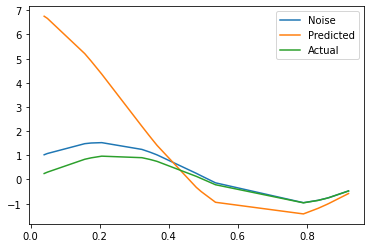

In [ ]:
#plot for Training set
for ind in range(len(m)):
  plot_(x,y,train[ind][1],y_n1)

# 8. Plot the estimate obtained by polynomial regression models for order M =1,2,3 and 9 for testing set along with y’ 1, y’ 2, , y’ 50. . Also plot the sin(2 π x’ i ).

In [ ]:
y_n=np.zeros(50)
t_n=[]
for i in range(50):
  y_n[i]=math.sin(2*math.pi*X[i])

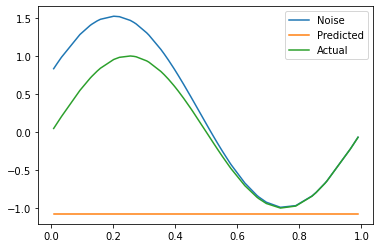

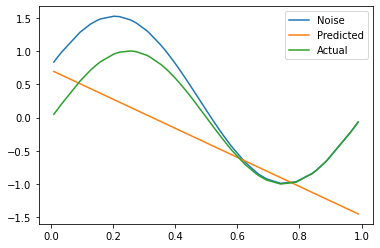

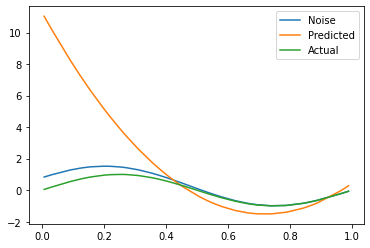

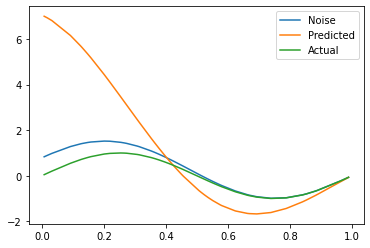

In [ ]:
#plot for Testing set
for ind in range(len(m)):
  plot_(X,Y,test[ind][1],y_n)

# 9. What happens when we increase the value of M. Note down your observations.

As we increase M the curve fits better and the predicted values are closer to the actual values as compared to the smaller values of M. The graph of predicted value passes through more data points for higher values of M.

# 10. Also ,try to find the statistical reasons behind your observation.

Clearly for a given training set when the degree is low the hypothesis will underfit the data and there will be a high bias error. However when the degree of the polynomial is high then the fit will get better and better on the training set (Note: This does not imply a good generalization)

When the degree of the polynomial is low then the error will be high. This error will decrease as the degree of the polynomial increases as we will tend to get a better fit. However the error will again increase as higher degree polynomials that overfit the training set will be a poor fit for the cross validation set.

# Lab Assingment 2


In [ ]:
def regularize(x,y,lamd):
  identity=np.identity(x.shape[1])
  F=np.linalg.inv((x.T).dot(x)+lamd*identity).dot((x.T).dot(y))
  return F

In [ ]:
def rms2(x,y,coeff):
  y_predicted=x.dot(coeff)
  rms=((np.sum((y_predicted-y)**2))/50)**0.5
  return [rms,y_predicted]


In [ ]:
x1=[]
x1.append(np.asarray([x//x,x]).T)
y1=np.asarray([y]).T

x1.append(np.asarray([x//x,x,x*x]).T)

x1.append(np.asarray([x//x,x,x*x,x*x*x]).T)

x1.append(np.asarray([x//x,x,x*x,x*x*x,x**4,x**5,x**6,x**7,x**8,x**9]).T)


In [ ]:
lambd = 0.00000003
m_1=[1,2,3,9]
coef_r=[]
for i in range(len(m_1)):
  coef_r.append(regularize(x1[i],y1,lambd))
  print(coef_r[i])

[[ 1.72839341]
 [-2.80276829]]
[[ 1.41104487]
 [-0.70171225]
 [-2.17952547]]
[[  0.63007001]
 [ 10.67130199]
 [-35.62075564]
 [ 24.74914544]]
[[  0.77176802]
 [  6.7370875 ]
 [-10.16987126]
 [-30.02872996]
 [ 24.46738183]
 [ 29.35640043]
 [  1.04690556]
 [-21.13861864]
 [-17.01490533]
 [ 15.99647688]]


In [ ]:
train_r=[]
for ind in range(len(m_1)):
  train_r.append(rms2(x1[ind],y1,coef_r[ind]))
  print(train_r[ind][0])

0.22424454944711686
0.20239733810009913
0.023015198726135333
0.00044541263788121715


In [ ]:
def plot_r(x,y1,y2,y3,y4):
  plt.plot(x,y1,label="Noise")
  plt.plot(x,y2,label="Predicted")
  plt.plot(x,y3,label="Actual")
  plt.plot(x,y4,label="Regularized")
  plt.legend()
  plt.show()

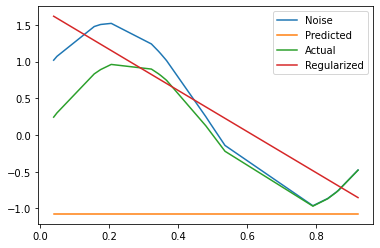

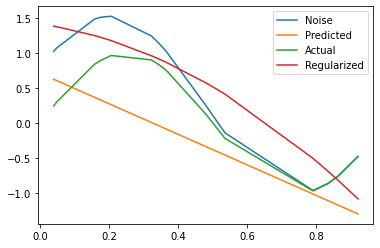

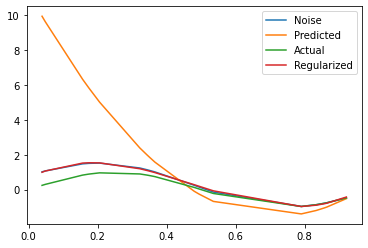

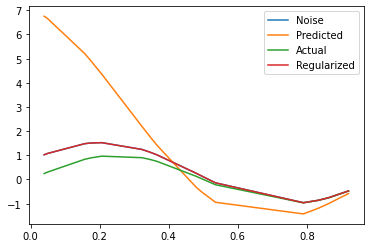

In [ ]:
#plot for Training set
for ind in range(len(m_1)):
  plot_r(x,y,train[ind][1],y_n1,train_r[ind][1])

In [ ]:
X1=[]
X1.append(np.asarray([X//X,X]).T)
Y1=np.asarray([Y]).T

X1.append(np.asarray([X//X,X,X*X]).T)

X1.append(np.asarray([X//X,X,X*X,X*X*X]).T)

X1.append(np.asarray([X//X,X,X*X,X*X*X,X**4,X**5,X**6,X**7,X**8,X**9]).T)


In [ ]:
test_r=[]
for ind in range(len(m_1)):
  test_r.append(rms2(X1[ind],Y1,coef_r[ind]))
  print(test_r[ind][0])

0.4680966986400106
0.5329414913677128
0.09290713007347647
0.003871455933148524


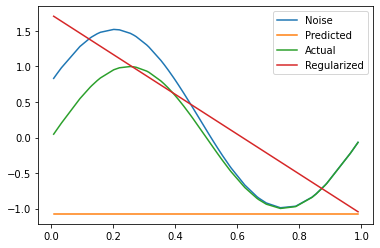

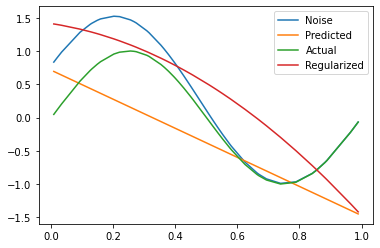

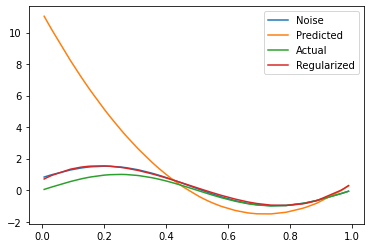

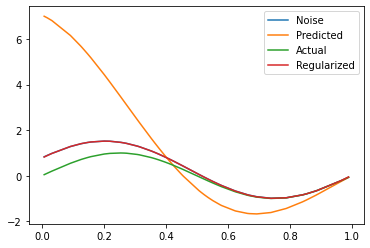

In [ ]:
#plot for Training set
for ind in range(len(m_1)):
  plot_r(X,Y,test[ind][1],y_n,test_r[ind][1])

In [ ]:
for ind in range(len(m_1)):
  print(test[ind][0],test_r[ind][0])

0.020320509262751404 0.4680966986400106
0.027765935662665636 0.5329414913677128
0.007153772216153906 0.09290713007347647
0.000549390941721365 0.003871455933148524


# Bivariate Case

In [ ]:
x2=np.random.uniform(0.0,1.0,20)  
x2=np.sort(x2)

In [ ]:
X2=np.random.uniform(0.0,1.0,50)
X2=np.sort(X2)

In [ ]:
ye=[0 for i in range(20)]
for i in range(20):
  ye[i]=np.sin(2*math.pi*((x[i]**2+x2[i]**2)**0.5))+normal_distribution(0.0,0.25,x[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


In [ ]:
Ye=[0 for i in range(50)]
for i in range(50):
  Ye[i]=np.sin(2*math.pi*((X[i]**2+X2[i]**2)**0.5))+normal_distribution(0.0,0.25,X[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


In [ ]:
def plot_b(x,y,z):
  fig = plt.figure(figsize = (12,10))
  ax = plt.axes(projection='3d')
  
  X, Y = np.meshgrid(x, y)
  Z, Z1 = np.meshgrid(z,z)
  surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
  
  ax.scatter(X, Y, Z, c = 'g', s = 100)
  # contour3D(X, Y, Z, cmap = 'binary')

  # Set axes label
  ax.set_xlabel('x', labelpad=20)
  ax.set_ylabel('y', labelpad=20)
  ax.set_zlabel('z', labelpad=20)

  #fig.colorbar(surf, shrink=0.5, aspect=8)

  plt.show()
  

In [ ]:
x_1=[]
x_1.append(np.asarray([x//x,x,x2]).T)
y_1=np.asarray([ye]).T

x_1.append(np.asarray([x//x,x,x2,x*x[:,0],x2*x2,x*x2]).T) 


x_1.append(np.asarray([x//x,x,x2,x*x,x2*x2,x*x2,x**3,x2**3,x**2*x2,x*x2**2,x**4,x2**4,x**3*x2,x**2*x2**2,x*x2**3,x**5,x2**5,x**4*x2,x**3*x2**2,x**2*x2**3,x*x2**4]).T)


In [ ]:
m_2=[1,2,5]
lambd = 0.00000003
coef_r1=[]
for i in range(len(m_2)):
  coef_r1.append(regularize(x_1[i],y_1,lambd))
  print(coef_r1[i])

[[ 0.82816745]
 [ 3.46425244]
 [-4.54371687]]
[[  0.72081288]
 [-20.20188216]
 [ 15.02449902]
 [-17.32248409]
 [-50.38240269]
 [ 73.54726711]]
[[ -0.28173794]
 [ 12.90392499]
 [  5.8617426 ]
 [-20.26548104]
 [  5.64339621]
 [-53.08513313]
 [ 50.67860177]
 [-36.35428173]
 [  1.19208886]
 [ -0.37052189]
 [-32.53651023]
 [ 52.34970572]
 [ -4.22094742]
 [ 40.37208775]
 [ 74.76693668]
 [ 12.80727998]
 [-48.56787243]
 [-13.54250744]
 [-18.67984163]
 [-14.11399806]
 [-15.47215511]]


In [ ]:
train_r1=[]
for ind in range(len(m_2)):
  train_r1.append(rms2(x_1[ind],y_1,coef_r1[ind]))
  print(train_r1[ind][0])

0.41767015020625187
0.196036282097584
0.007367880867579395


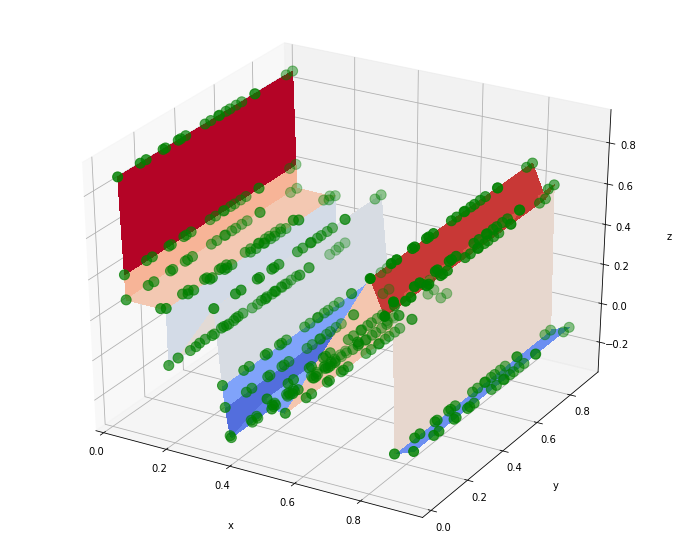

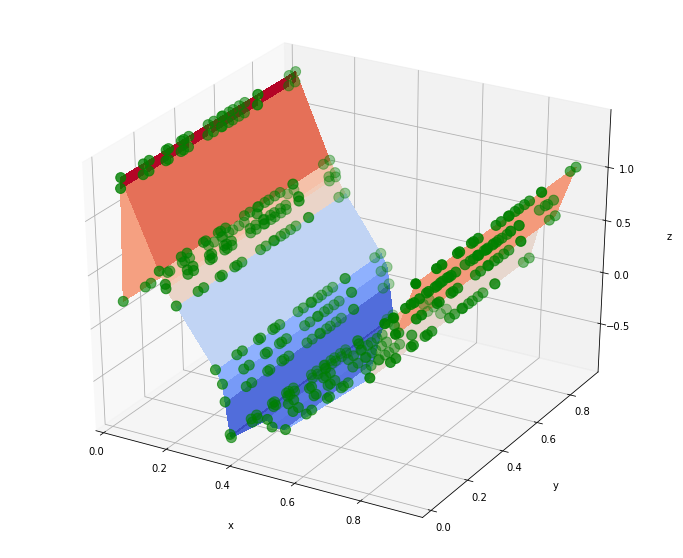

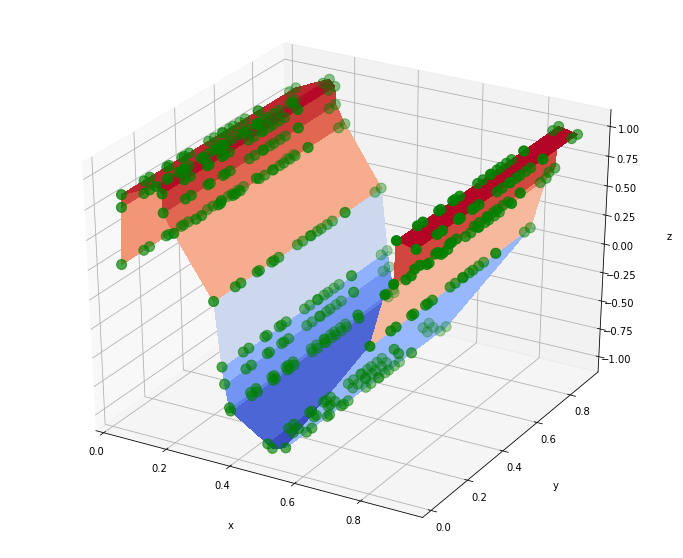

In [ ]:
for ind in range(len(m_2)):
  plot_b(x,x2,train_r1[ind][1])

In [ ]:
X_1=[]
X_1.append(np.asarray([X//X,X,X2]).T)
Y_1=np.asarray([Ye]).T

X_1.append(np.asarray([X//X,X,X2,X*X,X2*X2,X*X2]).T)


X_1.append(np.asarray([X//X,X,X2,X*X,X2*X2,X*X2,X**3,X2**3,X**2*X2,X*X2**2,X**4,X2**4,X**3*X2,X**2*X2**2,X*X2**3,X**5,X2**5,X**4*X2,X**3*X2**2,X**2*X2**3,X*X2**4]).T)


In [ ]:
test_r1=[]
for ind in range(len(m_2)):
  test_r1.append(rms2(X_1[ind],Y_1,coef_r1[ind]))
  print(test_r1[ind][0])

0.6694551850738931
0.798505142734064
0.2785628638148986


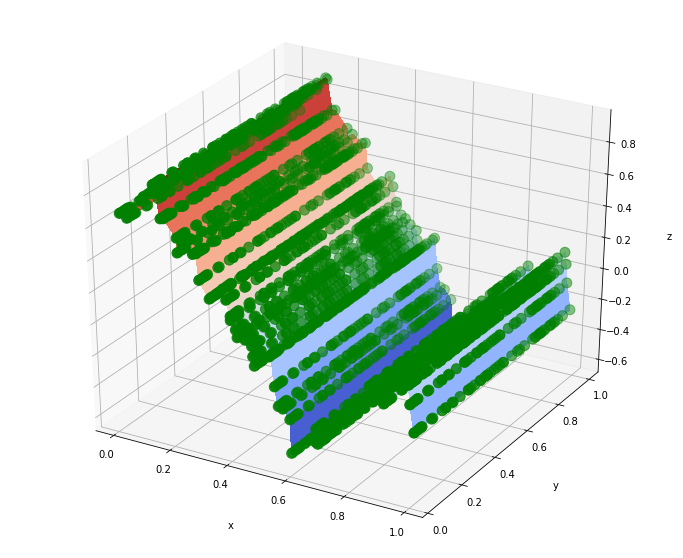

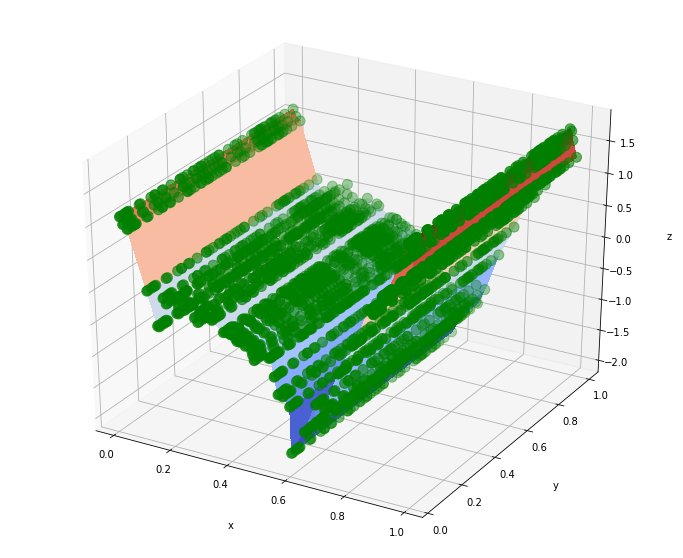

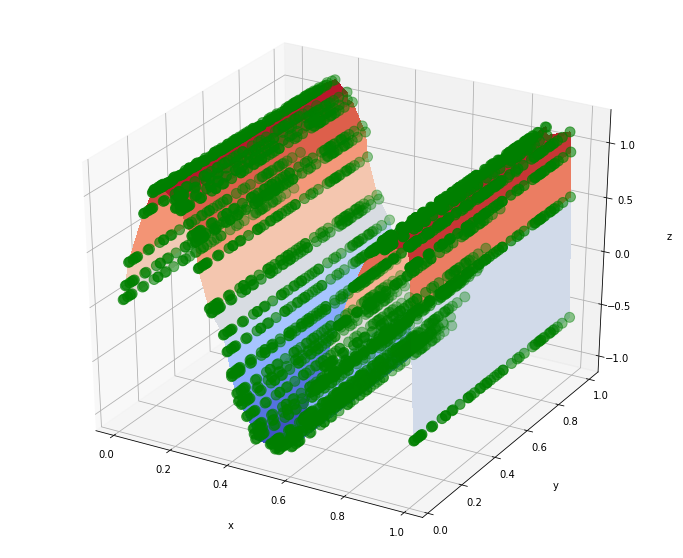

In [ ]:
for ind in range(len(m_2)):
  plot_b(X,X2,test_r1[ind][1])